In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, learning_curve
# Function to create the ANN model
import time
from tqdm import tqdm


# Membaca file CSV
data = pd.read_csv('gldm_features_combined.csv')

# Membuat DataFrame dari data
df = pd.DataFrame(data)

# Menampilkan DataFrame
print(df.columns)


Index(['Contrast_1_0', 'Contrast_1_45', 'Contrast_1_90', 'Contrast_1_135',
       'ASM_1_0', 'ASM_1_45', 'ASM_1_90', 'ASM_1_135', 'Entropy_1_0',
       'Entropy_1_45', 'Entropy_1_90', 'Entropy_1_135', 'Mean_1_0',
       'Mean_1_45', 'Mean_1_90', 'Mean_1_135', 'IDM_1_0', 'IDM_1_45',
       'IDM_1_90', 'IDM_1_135', 'Contrast_2_0', 'Contrast_2_45',
       'Contrast_2_90', 'Contrast_2_135', 'ASM_2_0', 'ASM_2_45', 'ASM_2_90',
       'ASM_2_135', 'Entropy_2_0', 'Entropy_2_45', 'Entropy_2_90',
       'Entropy_2_135', 'Mean_2_0', 'Mean_2_45', 'Mean_2_90', 'Mean_2_135',
       'IDM_2_0', 'IDM_2_45', 'IDM_2_90', 'IDM_2_135', 'Contrast_3_0',
       'Contrast_3_45', 'Contrast_3_90', 'Contrast_3_135', 'ASM_3_0',
       'ASM_3_45', 'ASM_3_90', 'ASM_3_135', 'Entropy_3_0', 'Entropy_3_45',
       'Entropy_3_90', 'Entropy_3_135', 'Mean_3_0', 'Mean_3_45', 'Mean_3_90',
       'Mean_3_135', 'IDM_3_0', 'IDM_3_45', 'IDM_3_90', 'IDM_3_135',
       'Contrast_4_0', 'Contrast_4_45', 'Contrast_4_90', 'Contrast_4_

Index(['Contrast_1_0', 'ASM_1_0', 'Entropy_1_0', 'Mean_1_0', 'IDM_1_0',
       'Label'],
      dtype='object')
      Contrast_1_0   ASM_1_0  Entropy_1_0  Mean_1_0   IDM_1_0  Label
0       121.660156  0.246983    11.297485 -1.418390  0.060954    0.0
1        42.448853  0.527082     5.844543 -1.266446  0.084641    0.0
2        32.008240  0.483254     6.062744 -1.303328  0.070153    0.0
3        44.135437  0.645022     6.431335 -1.299179  0.079226    0.0
4        47.201721  0.231551    16.129395 -1.448318  0.054553    0.0
...            ...       ...          ...       ...       ...    ...
1195      9.345154  0.675147     4.643616 -1.187306  0.090734    1.0
1196     23.087158  0.255670    21.499390 -1.508884  0.044567    1.0
1197     14.568787  0.286571    14.485596 -1.431967  0.053823    1.0
1198     28.835388  0.276306    17.078430 -1.484050  0.047586    1.0
1199     18.006836  0.299827    17.149658 -1.495895  0.047108    1.0

[1200 rows x 6 columns]


C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 689us/step


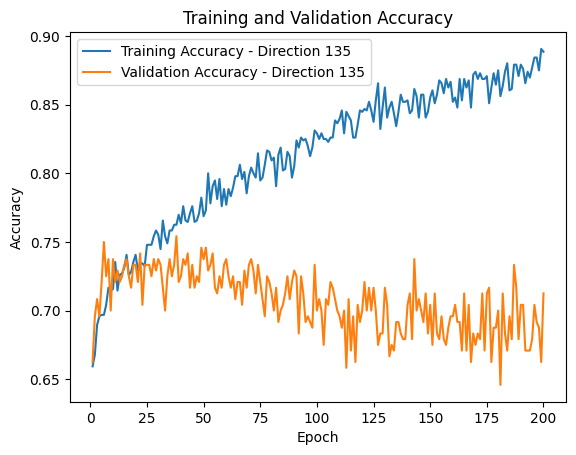

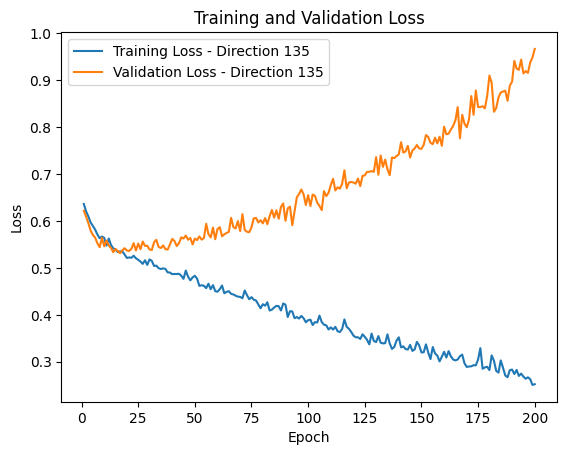

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9C909D400>
Best Accuracy of Model: 0.671875

30/30 [==============================] - 0s 538us/step
Training Accuracy: 0.8895833333333333
Validation Accuracy: 0.7125
Training F1 Score: 0.896887159533074
Validation F1 Score: 0.7228915662650602
Training Precision: 0.8443223443223443
Validation Precision: 0.6870229007633588
Cross-Validation Scores: [0.640625   0.59375    0.66145833 0.67708333 0.625     ]
Index(['Contrast_1_45', 'ASM_1_45', 'Entropy_1_45', 'Mean_1_45', 'IDM_1_45',
       'Label'],
      dtype='object')
      Contrast_1_45    ASM_1_45  Entropy_1_45  Mean_1_45  IDM_1_45  Label
0          0.132233  307.034058      0.138265  11.344238 -1.417028    0.0
1          0.190140  194.896912      0.304330   6.147949 -1.251574    0.0
2          0.161906  129.588623      0.254250   6.206177 -1.299526    0.0
3          0.309875  226.208557      0.282633   6.722656

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 679us/step


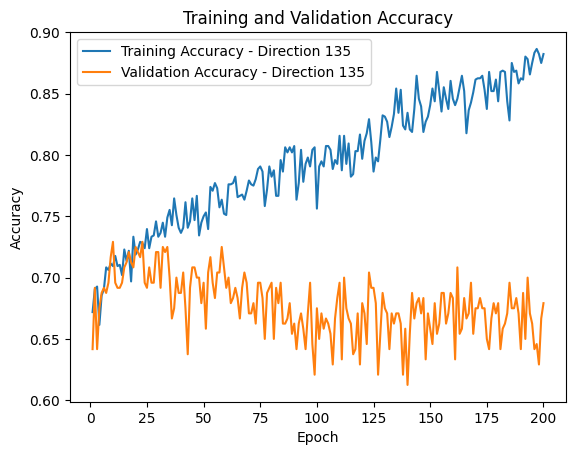

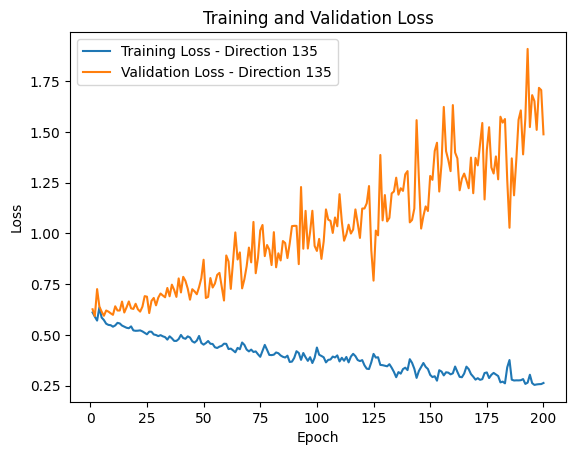

6/6 [==============================] - 0s 0s/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9E45518E0>
Best Accuracy of Model: 0.6635416666666666

30/30 [==============================] - 0s 540us/step
Training Accuracy: 0.8927083333333333
Validation Accuracy: 0.6791666666666667
Training F1 Score: 0.8900747065101388
Validation F1 Score: 0.6607929515418501
Training Precision: 0.9164835164835164
Validation Precision: 0.6880733944954128
Cross-Validation Scores: [0.65104167 0.625      0.61458333 0.66145833 0.66666667]
Index(['Contrast_1_90', 'ASM_1_90', 'Entropy_1_90', 'Mean_1_90', 'IDM_1_90',
       'Label'],
      dtype='object')
      Contrast_1_90  ASM_1_90  Entropy_1_90  Mean_1_90   IDM_1_90  Label
0         -1.125075  0.059872    306.174561   0.135092  11.273682    0.0
1         -0.868638  0.083594    214.313477   0.299744   5.790955    0.0
2         -0.942689  0.069999    132.490356   0.251248   6.059814    0.0
3         -0.610181  0.078693    235.5

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 679us/step


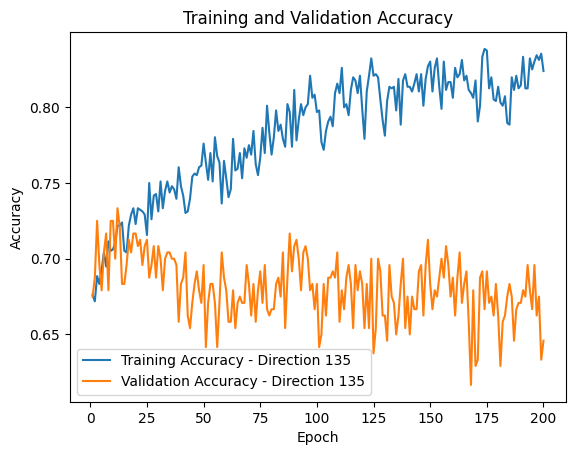

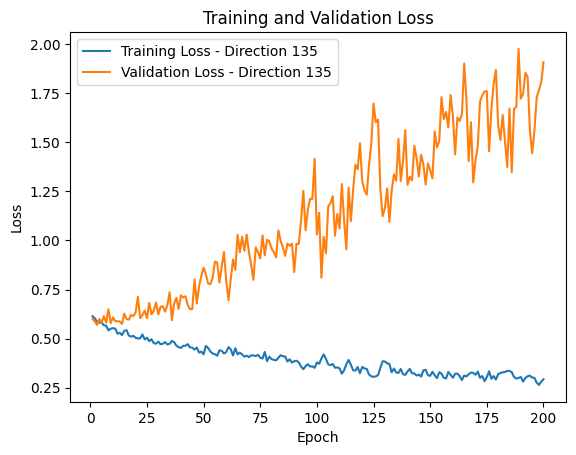

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9CA4B9AF0>
Best Accuracy of Model: 0.68125

30/30 [==============================] - 0s 538us/step
Training Accuracy: 0.8166666666666667
Validation Accuracy: 0.6458333333333334
Training F1 Score: 0.8310940499040308
Validation F1 Score: 0.6718146718146718
Training Precision: 0.7732142857142857
Validation Precision: 0.6170212765957447
Cross-Validation Scores: [0.66145833 0.59375    0.69270833 0.65104167 0.72395833]
Index(['Contrast_1_135', 'ASM_1_135', 'Entropy_1_135', 'Mean_1_135',
       'IDM_1_135', 'Label'],
      dtype='object')
      Contrast_1_135  ASM_1_135  Entropy_1_135  Mean_1_135  IDM_1_135  Label
0           5.540405  -1.417850       0.060138  308.988525   0.142904    0.0
1           1.474854  -1.254675       0.081160  193.485657   0.307238    0.0
2           1.940735  -1.298475       0.068909  129.128052   0.256047    0.0
3           0.270203  -1.28

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 340us/step


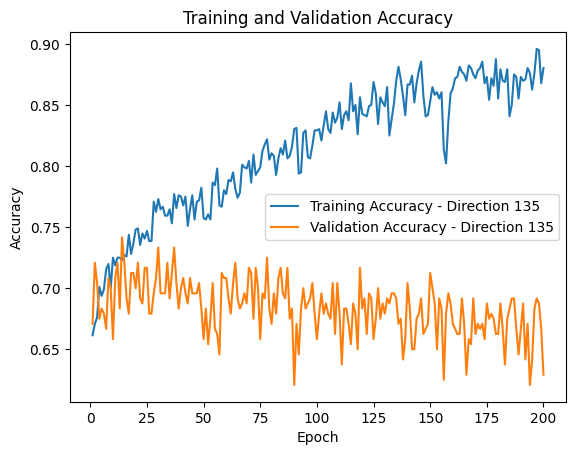

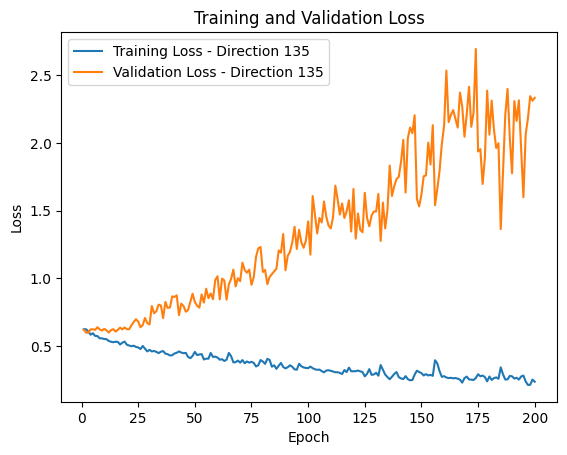

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9DB093730>
Best Accuracy of Model: 0.6666666666666666

30/30 [==============================] - 0s 683us/step
Training Accuracy: 0.8583333333333333
Validation Accuracy: 0.6291666666666667
Training F1 Score: 0.8411214953271029
Validation F1 Score: 0.5482233502538071
Training Precision: 0.9625668449197861
Validation Precision: 0.6835443037974683
Cross-Validation Scores: [0.625      0.61979167 0.703125   0.671875   0.65625   ]
Index(['Contrast_2_0', 'ASM_2_0', 'Entropy_2_0', 'Mean_2_0', 'IDM_2_0',
       'Label'],
      dtype='object')
      Contrast_2_0   ASM_2_0  Entropy_2_0  Mean_2_0   IDM_2_0  Label
0       205.016174  0.176150    11.651611 -1.435450  0.060920    0.0
1        54.612732  0.408676     6.457031 -1.311845  0.079145    0.0
2        55.615417  0.355396     6.825500 -1.342970  0.065642    0.0
3        53.299927  0.567970     6.905823 -1.328796  0.076

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 325us/step


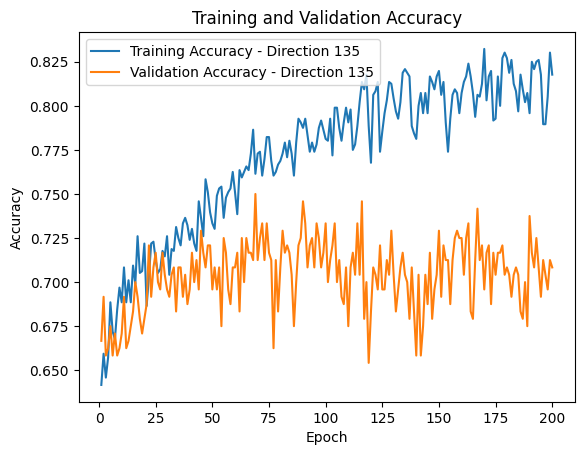

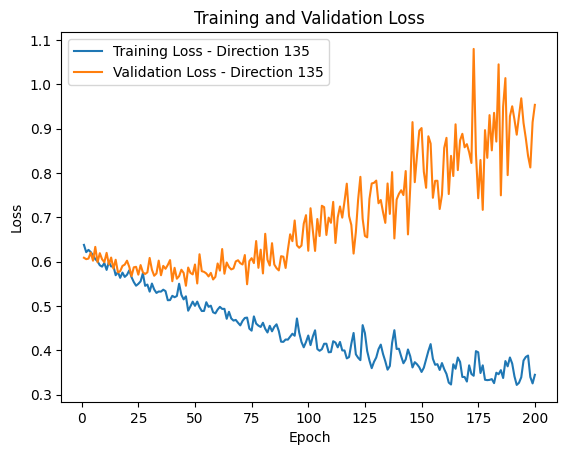

6/6 [==============================] - 0s 846us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9D2923EB0>
Best Accuracy of Model: 0.6489583333333333

30/30 [==============================] - 0s 1ms/step
Training Accuracy: 0.821875
Validation Accuracy: 0.7083333333333334
Training F1 Score: 0.8379146919431278
Validation F1 Score: 0.7286821705426356
Training Precision: 0.7713787085514834
Validation Precision: 0.6714285714285714
Cross-Validation Scores: [0.64583333 0.57291667 0.69791667 0.65625    0.65104167]
Index(['Contrast_2_45', 'ASM_2_45', 'Entropy_2_45', 'Mean_2_45', 'IDM_2_45',
       'Label'],
      dtype='object')
      Contrast_2_45    ASM_2_45  Entropy_2_45  Mean_2_45  IDM_2_45  Label
0          0.081854  332.660767      0.141112  11.747253 -1.426318    0.0
1          0.127663  209.415527      0.272343   6.879150 -1.288550    0.0
2          0.104284  148.073425      0.220334   6.915161 -1.331529    0.0
3          0.218947  243.811951      0.2711

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 697us/step


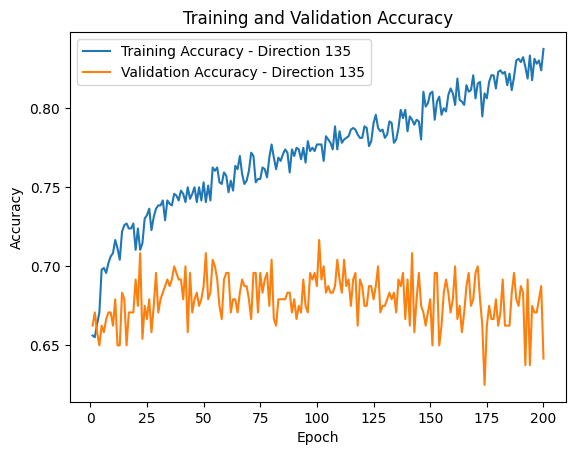

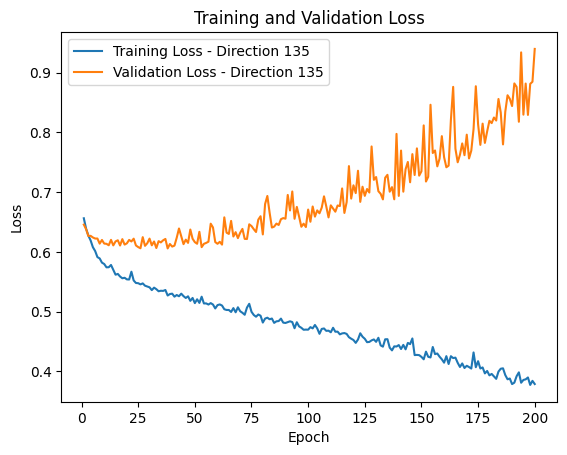

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9D284CA60>
Best Accuracy of Model: 0.6510416666666666

30/30 [==============================] - 0s 707us/step
Training Accuracy: 0.83125
Validation Accuracy: 0.6416666666666667
Training F1 Score: 0.8254310344827586
Validation F1 Score: 0.5943396226415094
Training Precision: 0.8587443946188341
Validation Precision: 0.6702127659574468
Cross-Validation Scores: [0.625      0.546875   0.69791667 0.59895833 0.65104167]
Index(['Contrast_2_90', 'ASM_2_90', 'Entropy_2_90', 'Mean_2_90', 'IDM_2_90',
       'Label'],
      dtype='object')
      Contrast_2_90  ASM_2_90  Entropy_2_90  Mean_2_90   IDM_2_90  Label
0         -1.308048  0.059602    330.178406   0.132468  11.627930    0.0
1         -1.032351  0.076702    241.922363   0.278154   6.364502    0.0
2         -1.117252  0.063452    154.267944   0.221267   6.661011    0.0
3         -0.765413  0.074476    243.697754   0.

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 25us/step


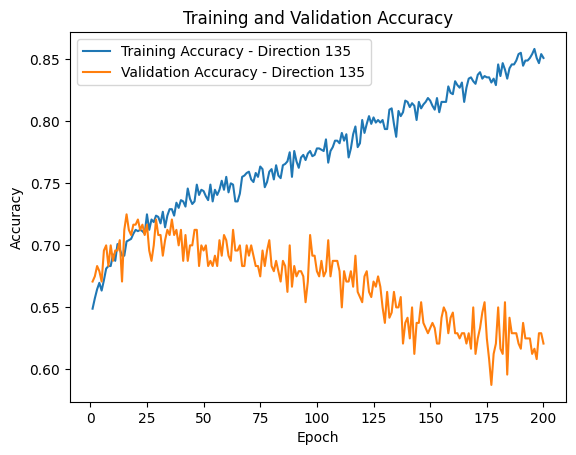

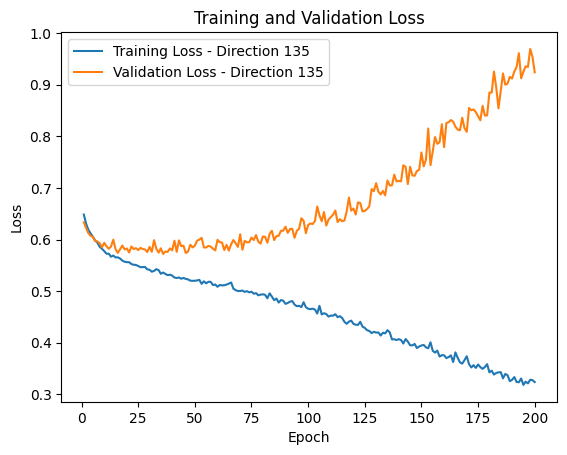

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9D4BBB670>
Best Accuracy of Model: 0.6333333333333333

30/30 [==============================] - 0s 840us/step
Training Accuracy: 0.875
Validation Accuracy: 0.6208333333333333
Training F1 Score: 0.8775510204081632
Validation F1 Score: 0.6160337552742615
Training Precision: 0.8634538152610441
Validation Precision: 0.6134453781512605
Cross-Validation Scores: [0.484375   0.43229167 0.640625   0.65104167 0.61458333]
Index(['Contrast_2_135', 'ASM_2_135', 'Entropy_2_135', 'Mean_2_135',
       'IDM_2_135', 'Label'],
      dtype='object')
      Contrast_2_135  ASM_2_135  Entropy_2_135  Mean_2_135  IDM_2_135  Label
0           8.627625  -1.429472       0.056869  334.934326   0.142012    0.0
1           2.694519  -1.296337       0.074187  210.660522   0.279760    0.0
2           3.464783  -1.340703       0.061826  144.557617   0.226783    0.0
3           0.956177  -1.3159

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 339us/step


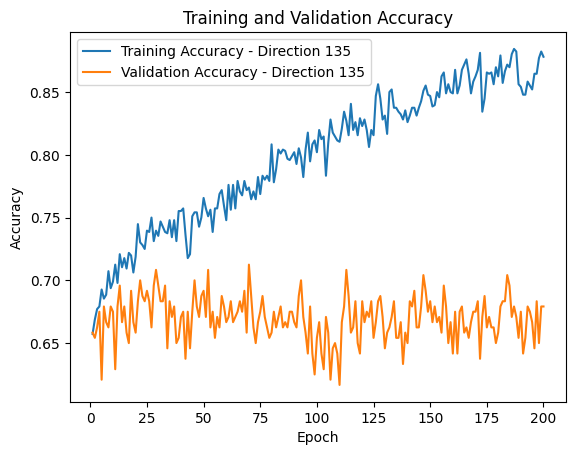

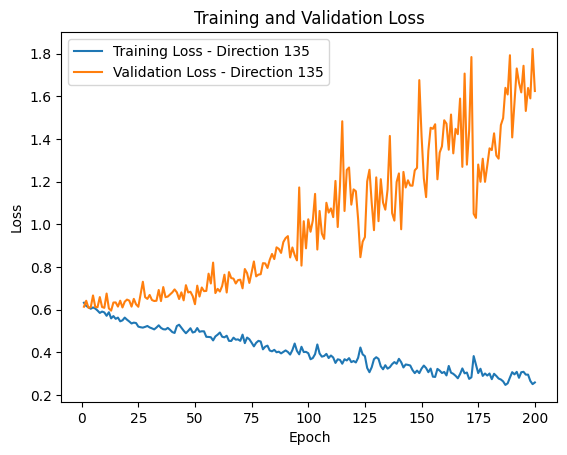

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9F9E50AC0>
Best Accuracy of Model: 0.6479166666666667

30/30 [==============================] - 0s 683us/step
Training Accuracy: 0.8833333333333333
Validation Accuracy: 0.6791666666666667
Training F1 Score: 0.8908382066276803
Validation F1 Score: 0.6831275720164609
Training Precision: 0.8400735294117647
Validation Precision: 0.664
Cross-Validation Scores: [0.59375    0.625      0.69270833 0.65625    0.65625   ]
Index(['Contrast_3_0', 'ASM_3_0', 'Entropy_3_0', 'Mean_3_0', 'IDM_3_0',
       'Label'],
      dtype='object')
      Contrast_3_0   ASM_3_0  Entropy_3_0  Mean_3_0   IDM_3_0  Label
0       292.752625  0.155259    11.989075 -1.460702  0.065016    0.0
1        75.879150  0.353297     6.180969 -1.315120  0.084961    0.0
2        70.999695  0.302479     6.582581 -1.343497  0.072027    0.0
3        64.791748  0.502865     6.470825 -1.307965  0.084507    0.0
4 

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 349us/step


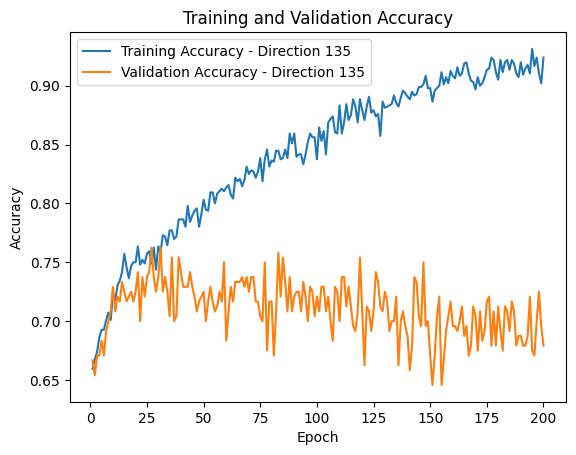

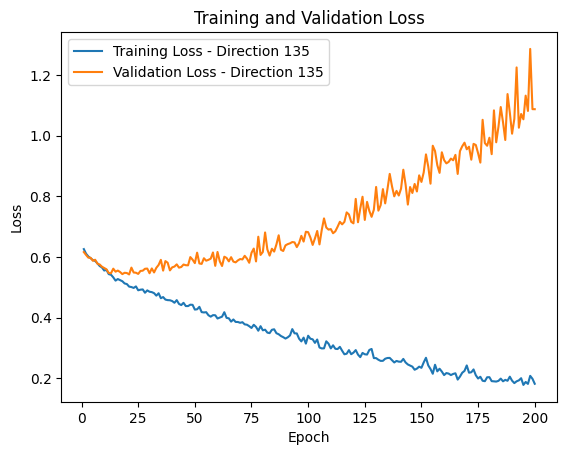

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E983084160>
Best Accuracy of Model: 0.6760416666666665

30/30 [==============================] - 0s 687us/step
Training Accuracy: 0.9395833333333333
Validation Accuracy: 0.6791666666666667
Training F1 Score: 0.9414141414141414
Validation F1 Score: 0.6637554585152838
Training Precision: 0.9173228346456693
Validation Precision: 0.6846846846846847
Cross-Validation Scores: [0.671875   0.63020833 0.71875    0.6875     0.65104167]
Index(['Contrast_3_45', 'ASM_3_45', 'Entropy_3_45', 'Mean_3_45', 'IDM_3_45',
       'Label'],
      dtype='object')
      Contrast_3_45    ASM_3_45  Entropy_3_45  Mean_3_45  IDM_3_45  Label
0          0.066854  344.001160      0.143791  12.535400 -1.424079    0.0
1          0.106602  202.362244      0.274103   6.918457 -1.268144    0.0
2          0.086257  142.938782      0.229679   6.902954 -1.308689    0.0
3          0.177613  237.038696  

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 331us/step


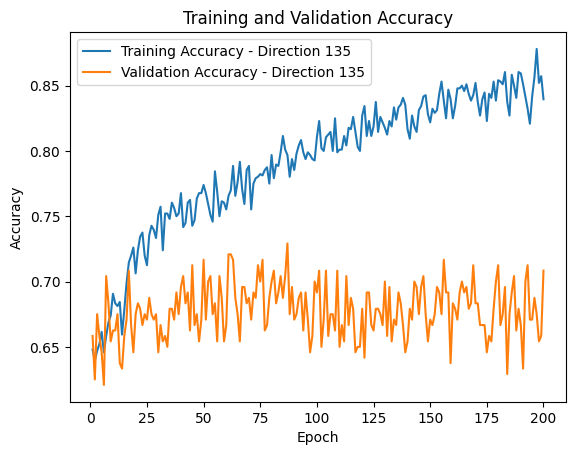

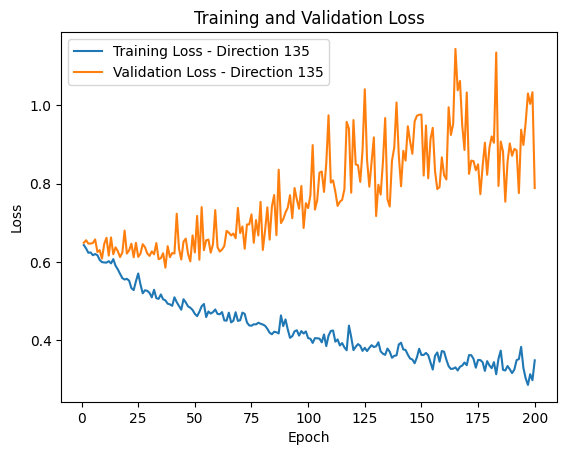

6/6 [==============================] - 0s 1ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9893FEAC0>
Best Accuracy of Model: 0.6572916666666667

30/30 [==============================] - 0s 847us/step
Training Accuracy: 0.8510416666666667
Validation Accuracy: 0.7083333333333334
Training F1 Score: 0.8636796949475691
Validation F1 Score: 0.7177419354838709
Training Precision: 0.798941798941799
Validation Precision: 0.6846153846153846
Cross-Validation Scores: [0.64583333 0.59895833 0.66666667 0.67708333 0.578125  ]
Index(['Contrast_3_90', 'ASM_3_90', 'Entropy_3_90', 'Mean_3_90', 'IDM_3_90',
       'Label'],
      dtype='object')
      Contrast_3_90  ASM_3_90  Entropy_3_90  Mean_3_90   IDM_3_90  Label
0         -1.391251  0.061190    355.059204   0.125222  11.841187    0.0
1         -1.111639  0.081309    241.929077   0.263373   6.103638    0.0
2         -1.195863  0.068469    149.743896   0.218004   6.347046    0.0
3         -0.857674  0.081200    239.1

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 681us/step


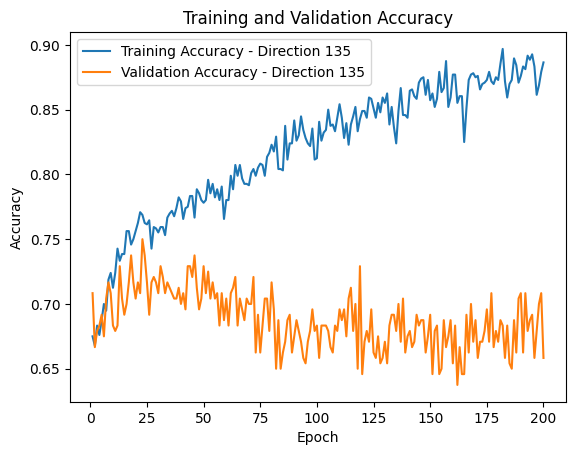

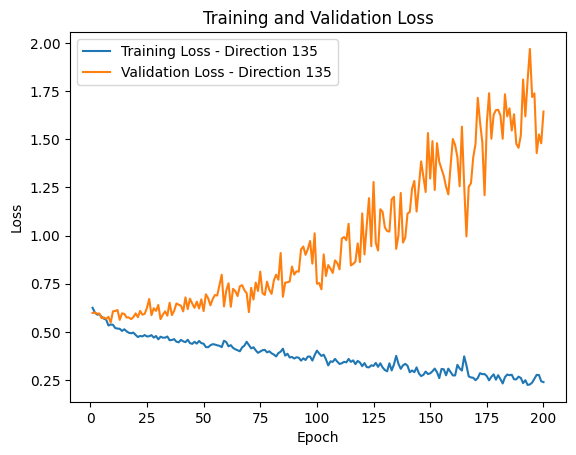

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9FEF6B8E0>
Best Accuracy of Model: 0.6739583333333333

30/30 [==============================] - 0s 938us/step
Training Accuracy: 0.8854166666666666
Validation Accuracy: 0.6583333333333333
Training F1 Score: 0.8956356736242885
Validation F1 Score: 0.6746031746031746
Training Precision: 0.8251748251748252
Validation Precision: 0.6343283582089553
Cross-Validation Scores: [0.671875   0.59895833 0.65625    0.67708333 0.671875  ]
Index(['Contrast_3_135', 'ASM_3_135', 'Entropy_3_135', 'Mean_3_135',
       'IDM_3_135', 'Label'],
      dtype='object')
      Contrast_3_135  ASM_3_135  Entropy_3_135  Mean_3_135  IDM_3_135  Label
0          10.583069  -1.433798       0.052530  344.738647   0.150025    0.0
1           3.505981  -1.276699       0.071853  201.945679   0.276692    0.0
2           4.379333  -1.323796       0.060876  134.424683   0.234145    0.0
3           1.48

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 646us/step


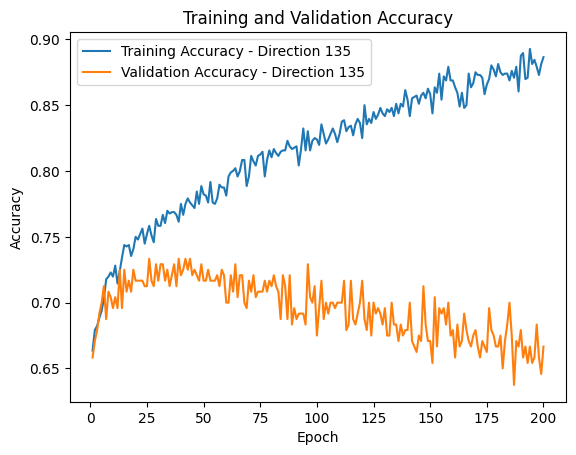

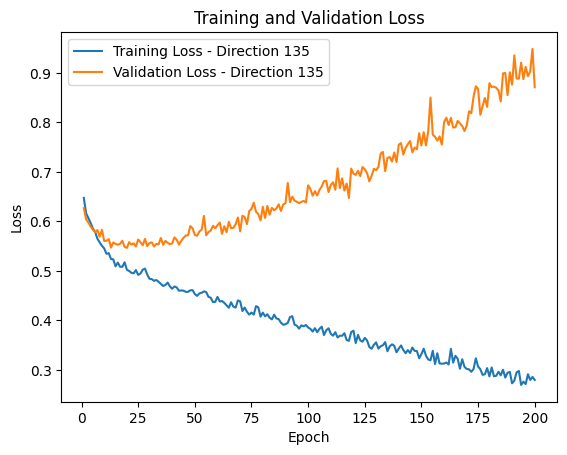

6/6 [==============================] - 0s 1ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9E788CA30>
Best Accuracy of Model: 0.6739583333333333

30/30 [==============================] - 0s 658us/step
Training Accuracy: 0.8885416666666667
Validation Accuracy: 0.6666666666666666
Training F1 Score: 0.8920282542885974
Validation F1 Score: 0.6551724137931034
Training Precision: 0.8683693516699411
Validation Precision: 0.6666666666666666
Cross-Validation Scores: [0.65625    0.58333333 0.69270833 0.671875   0.66145833]
Index(['Contrast_4_0', 'ASM_4_0', 'Entropy_4_0', 'Mean_4_0', 'IDM_4_0',
       'Label'],
      dtype='object')
      Contrast_4_0   ASM_4_0  Entropy_4_0  Mean_4_0   IDM_4_0  Label
0       315.211182  0.155481    11.955200 -1.435899  0.075179    0.0
1        85.002319  0.335560     6.017517 -1.287665  0.096284    0.0
2        75.533875  0.288893     6.343079 -1.316913  0.084106    0.0
3        66.291931  0.467710     5.524963 -1.251226  0.107

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 711us/step


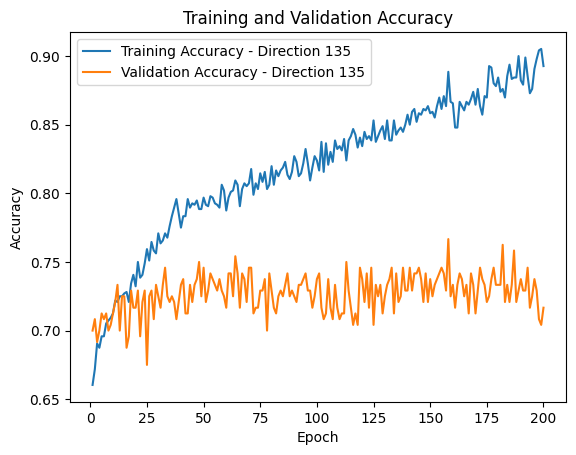

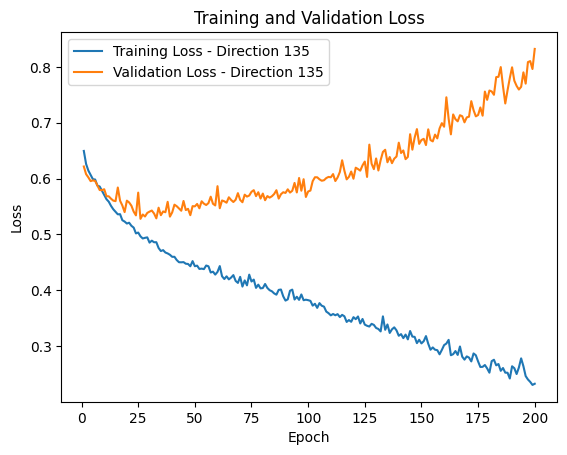

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9D7E7A0D0>
Best Accuracy of Model: 0.6583333333333333

30/30 [==============================] - 0s 878us/step
Training Accuracy: 0.8854166666666666
Validation Accuracy: 0.7166666666666667
Training F1 Score: 0.8929961089494164
Validation F1 Score: 0.7343750000000001
Training Precision: 0.8406593406593407
Validation Precision: 0.6811594202898551
Cross-Validation Scores: [0.66145833 0.58854167 0.63020833 0.66666667 0.63541667]
Index(['Contrast_4_45', 'ASM_4_45', 'Entropy_4_45', 'Mean_4_45', 'IDM_4_45',
       'Label'],
      dtype='object')
      Contrast_4_45    ASM_4_45  Entropy_4_45  Mean_4_45  IDM_4_45  Label
0          0.065653  362.796143      0.157341  11.838562 -1.404031    0.0
1          0.100658  205.288269      0.280839   6.494202 -1.243691    0.0
2          0.082639  142.494812      0.246567   6.387817 -1.281930    0.0
3          0.160969  207.363098  

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 73us/step


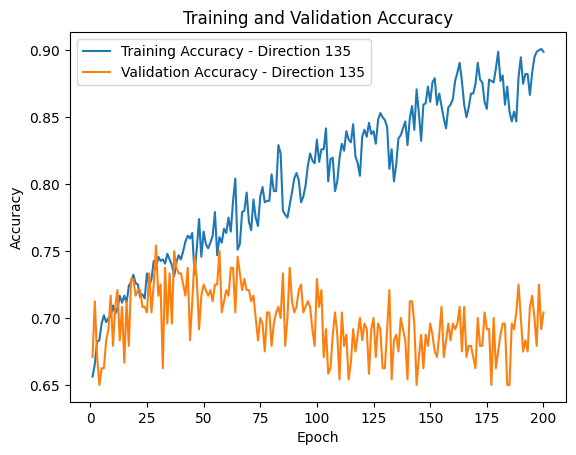

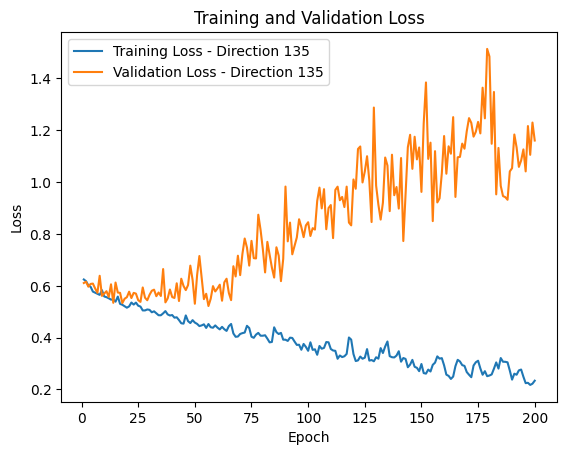

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E983102970>
Best Accuracy of Model: 0.6447916666666668

30/30 [==============================] - 0s 659us/step
Training Accuracy: 0.9020833333333333
Validation Accuracy: 0.7041666666666667
Training F1 Score: 0.9056224899598393
Validation F1 Score: 0.6978723404255319
Training Precision: 0.877431906614786
Validation Precision: 0.7008547008547008
Cross-Validation Scores: [0.65625    0.58333333 0.67708333 0.66145833 0.6875    ]
Index(['Contrast_4_90', 'ASM_4_90', 'Entropy_4_90', 'Mean_4_90', 'IDM_4_90',
       'Label'],
      dtype='object')
      Contrast_4_90  ASM_4_90  Entropy_4_90  Mean_4_90   IDM_4_90  Label
0         -1.405183  0.069980    340.556091   0.140325  11.628113    0.0
1         -1.139838  0.090396    234.361389   0.277088   5.863464    0.0
2         -1.216469  0.078163    143.221191   0.247346   6.015442    0.0
3         -0.900444  0.100564    212.9

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 851us/step


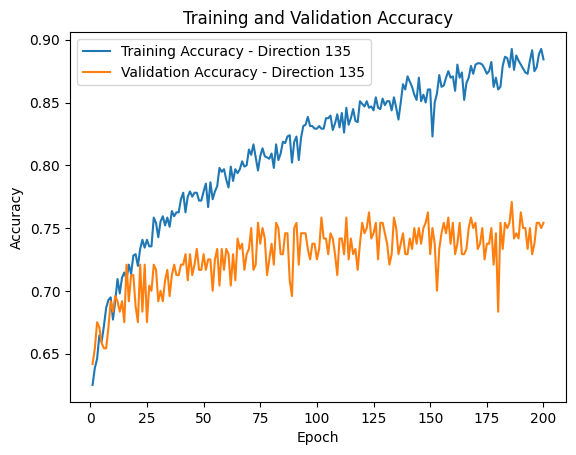

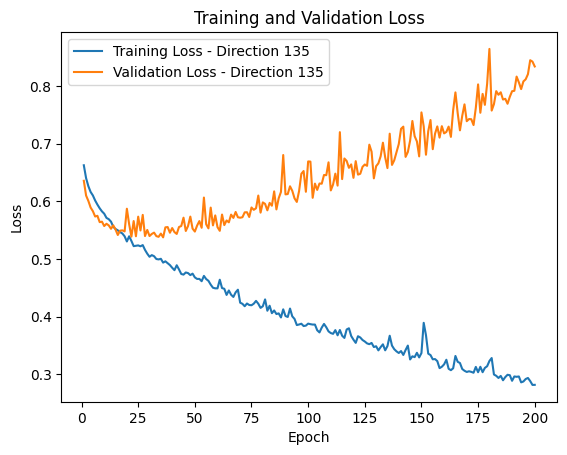

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9F3B49F70>
Best Accuracy of Model: 0.6291666666666667

30/30 [==============================] - 0s 676us/step
Training Accuracy: 0.8989583333333333
Validation Accuracy: 0.7541666666666667
Training F1 Score: 0.9001029866117405
Validation F1 Score: 0.7445887445887445
Training Precision: 0.8936605316973415
Validation Precision: 0.7610619469026548
Cross-Validation Scores: [0.625      0.54166667 0.61458333 0.61979167 0.63541667]
Index(['Contrast_4_135', 'ASM_4_135', 'Entropy_4_135', 'Mean_4_135',
       'IDM_4_135', 'Label'],
      dtype='object')
      Contrast_4_135  ASM_4_135  Entropy_4_135  Mean_4_135  IDM_4_135  Label
0          11.006958  -1.418288       0.058582  350.482849   0.163994    0.0
1           3.822754  -1.256904       0.078551  201.050720   0.286747    0.0
2           4.643738  -1.304061       0.067717  132.025330   0.250235    0.0
3           1.74

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 701us/step


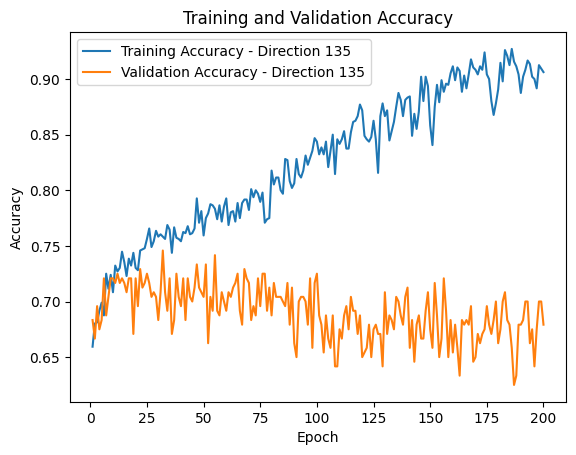

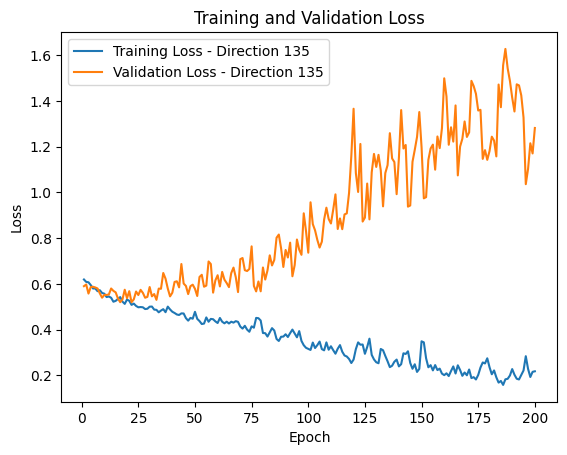

6/6 [==============================] - 0s 1ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E98A6B79A0>
Best Accuracy of Model: 0.6697916666666667

30/30 [==============================] - 0s 695us/step
Training Accuracy: 0.9177083333333333
Validation Accuracy: 0.6791666666666667
Training F1 Score: 0.9169295478443743
Validation F1 Score: 0.6778242677824267
Training Precision: 0.929637526652452
Validation Precision: 0.6694214876033058
Cross-Validation Scores: [0.53125    0.58333333 0.66666667 0.703125   0.65104167]
Index(['Contrast_5_0', 'ASM_5_0', 'Entropy_5_0', 'Mean_5_0', 'IDM_5_0',
       'Label'],
      dtype='object')
      Contrast_5_0   ASM_5_0  Entropy_5_0  Mean_5_0   IDM_5_0  Label
0       283.211121  0.162784    11.893738 -1.463792  0.086288    0.0
1        88.426453  0.341226     6.063965 -1.312882  0.104683    0.0
2        71.649414  0.295455     6.242188 -1.339146  0.093753    0.0
3        67.630920  0.443898     5.221619 -1.239117  0.1147

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 423us/step


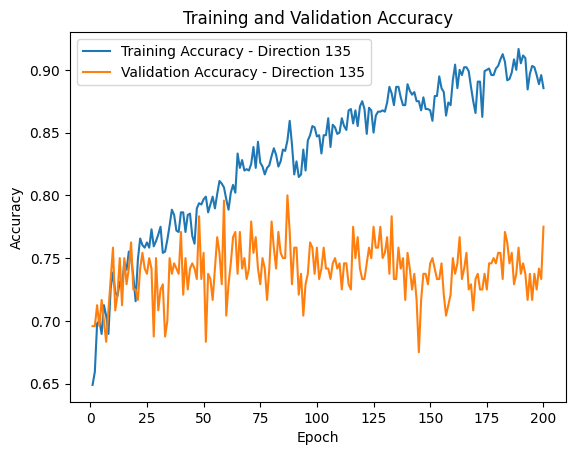

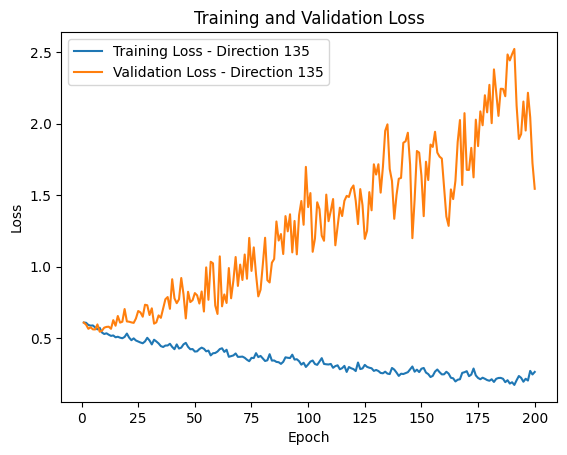

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9CC7679A0>
Best Accuracy of Model: 0.6864583333333334

30/30 [==============================] - 0s 777us/step
Training Accuracy: 0.8989583333333333
Validation Accuracy: 0.775
Training F1 Score: 0.9005128205128204
Validation F1 Score: 0.7610619469026549
Training Precision: 0.8904665314401623
Validation Precision: 0.7962962962962963
Cross-Validation Scores: [0.66666667 0.61979167 0.71354167 0.66666667 0.65104167]
Index(['Contrast_5_45', 'ASM_5_45', 'Entropy_5_45', 'Mean_5_45', 'IDM_5_45',
       'Label'],
      dtype='object')
      Contrast_5_45    ASM_5_45  Entropy_5_45  Mean_5_45  IDM_5_45  Label
0          0.070075  355.695129      0.166399  12.723694 -1.382223    0.0
1          0.103939  196.742554      0.275888   6.839966 -1.237673    0.0
2          0.085875  138.532959      0.245381   6.805359 -1.263895    0.0
3          0.152716  211.731018      0.302320 

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 652us/step


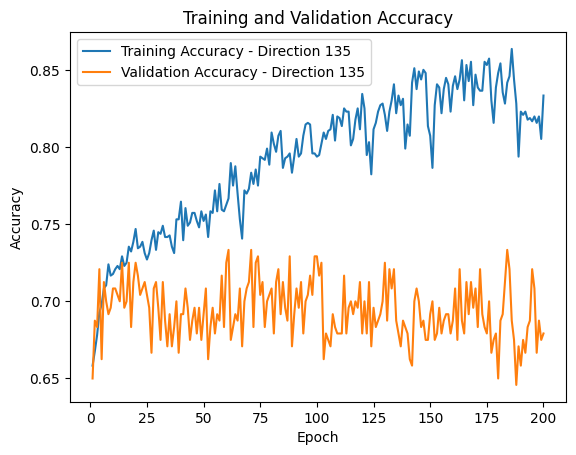

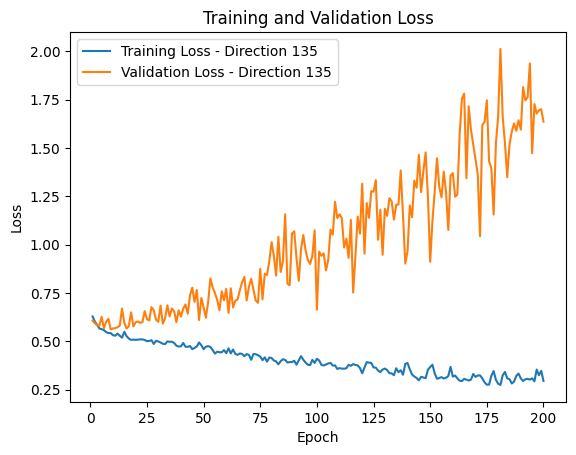

6/6 [==============================] - 0s 2ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9FEEA4AF0>
Best Accuracy of Model: 0.6625

30/30 [==============================] - 0s 1ms/step
Training Accuracy: 0.846875
Validation Accuracy: 0.6791666666666667
Training F1 Score: 0.8632558139534884
Validation F1 Score: 0.7049808429118773
Training Precision: 0.7824620573355818
Validation Precision: 0.6433566433566433
Cross-Validation Scores: [0.66145833 0.59895833 0.640625   0.66666667 0.65104167]
Index(['Contrast_5_90', 'ASM_5_90', 'Entropy_5_90', 'Mean_5_90', 'IDM_5_90',
       'Label'],
      dtype='object')
      Contrast_5_90  ASM_5_90  Entropy_5_90  Mean_5_90   IDM_5_90  Label
0         -1.380414  0.078224    364.353455   0.132259  11.440186    0.0
1         -1.133509  0.097234    231.024048   0.259517   5.874023    0.0
2         -1.204857  0.085487    146.317566   0.223814   5.875732    0.0
3         -0.920864  0.107713    220.214172   0.282998   5.05

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 443us/step


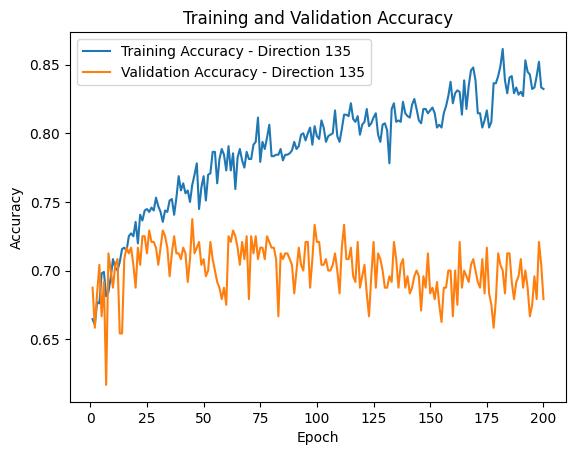

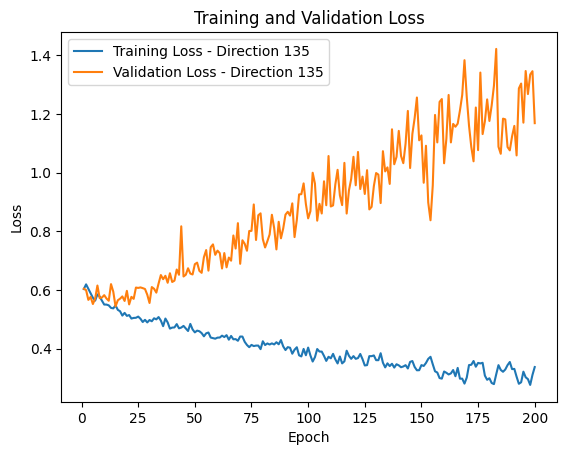

6/6 [==============================] - 0s 3ms/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9FEEA6880>
Best Accuracy of Model: 0.6666666666666666

30/30 [==============================] - 0s 688us/step
Training Accuracy: 0.8166666666666667
Validation Accuracy: 0.6791666666666667
Training F1 Score: 0.8339622641509434
Validation F1 Score: 0.7003891050583657
Training Precision: 0.7647058823529411
Validation Precision: 0.6474820143884892
Cross-Validation Scores: [0.66145833 0.58333333 0.66666667 0.65104167 0.65104167]
Index(['Contrast_5_135', 'ASM_5_135', 'Entropy_5_135', 'Mean_5_135',
       'IDM_5_135', 'Label'],
      dtype='object')
      Contrast_5_135  ASM_5_135  Entropy_5_135  Mean_5_135  IDM_5_135  Label
0          10.412170  -1.403272       0.054385  341.646729   0.175077    0.0
1           3.774109  -1.255969       0.074643  197.225830   0.287038    0.0
2           4.479248  -1.290667       0.063827  124.496094   0.254589    0.0
3           1.86

C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:600, 'Label'] = 0
C:\Users\hanif\AppData\Local\Temp\ipykernel_14412\717897024.py:69: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 679us/step


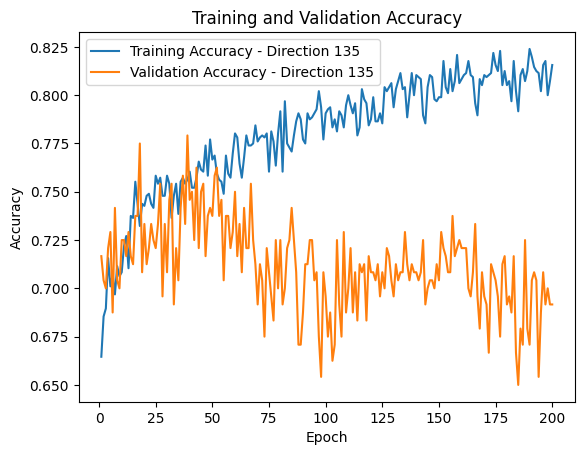

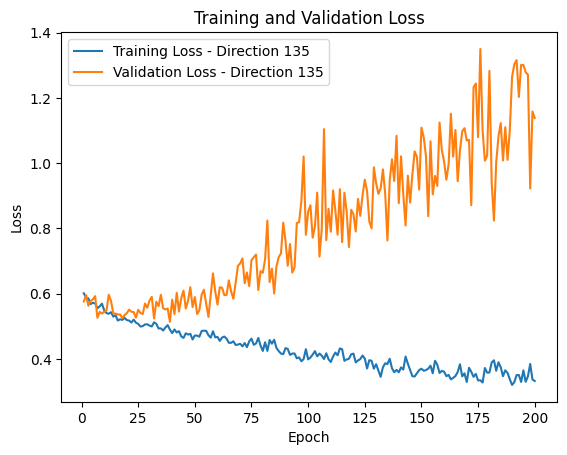

6/6 [==============================] - 0s 998us/step
Best Model: <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001E9DB05EFD0>
Best Accuracy of Model: 0.6802083333333333

30/30 [==============================] - 0s 539us/step
Training Accuracy: 0.8239583333333333
Validation Accuracy: 0.6916666666666667
Training F1 Score: 0.8009422850412251
Validation F1 Score: 0.6476190476190476
Training Precision: 0.9264305177111717
Validation Precision: 0.7391304347826086
Cross-Validation Scores: [0.58854167 0.5625     0.72395833 0.69791667 0.63541667]
Execution Time: 1916.4249124526978 seconds


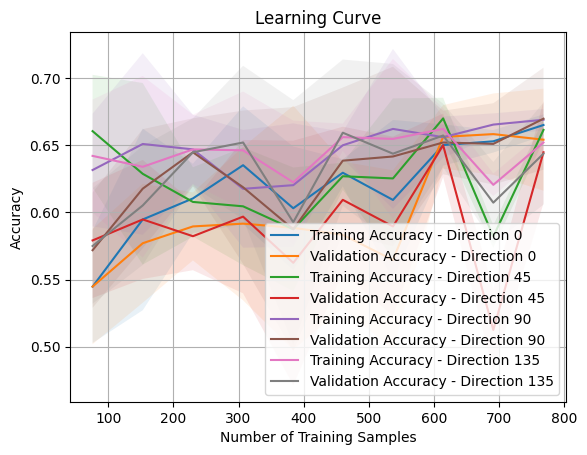

Average Accuracy: 0.8711979166666668
Average F1 Score: 0.8748997223017261
Average Precision: 0.8572750272089535


In [2]:
def create_model(units_1=64, units_2=32, units_3=16, units_4=8, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units_2, activation='relu'))
    model.add(Dense(units_3, activation='relu'))
    model.add(Dense(units_4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

# List of directions
directions = ['0', '45', '90', '135']
distances = ['1', '2', '3', '4', '5']
# Hapus kolom image
# data.drop('Image', axis=1, inplace=True)
# Memisahkan DataFrame berdasarkan arah
dfs = [data.filter(regex=f'_{direction}$') for direction in directions]

# Set the 'Label' column values using .loc

accuracies = []
f1score = []
precision = []
index_column = ["Akurasi", "F1_Score", "Presisi"]
# Loop through each direction
train_mean_list = []
test_mean_list = []
val_train_mean_list = []
val_test_mean_list = []

start_time = time.time()
dfs = {}
for distance in distances:
    for direction in directions:
        # Membuat nama DataFrame yang sesuai
        df_name = f'df_{distance}_{direction}'

        # Memilih kolom-kolom yang sesuai dengan kombinasi distance dan direction
        selected_columns = [col for col in df.columns if f"_{distance}_{direction}" in col]

        # Membuat DataFrame baru berdasarkan kolom yang dipilih
        dfs[df_name] = df[selected_columns]

for df_name, df_selected in dfs.items():


    # Select the corresponding DataFrame
    df_selected.loc[:600, 'Label'] = 0
    df_selected.loc[600:, 'Label'] = 1
    
    
    print(df_selected.columns)
    # Prepare the data
    X = df_selected.drop('Label', axis=1).values
    y = df_selected['Label'].values
    print(df_selected)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # Create the KerasClassifier wrapper for scikit-learn compatibility
    model = KerasClassifier(build_fn=create_model, verbose=0)
    
    # Define the hyperparameter grid for Random Search
    param_grid = {
        'units_1': [32, 64, 128],
        'units_2': [16, 32, 64],
        'units_3': [8, 16, 32],
        'units_4': [4, 8, 16],
        'learning_rate': [0.001, 0.01, 0.1]
    }
    
    # Perform Random Search
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, cv=3, scoring='accuracy', n_iter=15)
    random_search.fit(X_train, y_train)
    
    # Get the best model and its accuracy
    best_model = random_search.best_estimator_
    best_acc = random_search.best_score_



    train_sizes, train_scores, test_scores = learning_curve(
        best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    train_mean_list.append(train_mean)
    test_mean_list.append(test_mean)
    
    # Pelatihan model dengan 100 epoch
    model = best_model.model  # Dapatkan model asli dari KerasClassifier
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,batch_size=32, verbose=0)

    # Mengambil akurasi dan loss dari setiap epoch
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    
    

    # Menghasilkan grafik akurasi
    plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy - Direction {}'.format(direction))
    plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy - Direction {}'.format(direction))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

    # Menghasilkan grafik loss
    plt.plot(range(1, len(loss) + 1), loss, label='Training Loss - Direction {}'.format(direction))
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss - Direction {}'.format(direction))
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    
    # Make predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred = [round(x[0]) for x in y_pred]

    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    # Print the results
    print("Best Model:", best_model)
    print("Best Accuracy of Model:", best_acc)
    
    print()
    
    # Calculate the accuracy, F1 score, and precision
    train_acc = accuracy_score(y_train, best_model.predict(X_train))
    val_acc = accuracy_score(y_test, y_pred)

    train_f1 = f1_score(y_train, best_model.predict(X_train))
    val_f1 = f1_score(y_test, y_pred)

    train_prec = precision_score(y_train, best_model.predict(X_train))
    val_prec = precision_score(y_test, y_pred)

    # Print the results
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)
    print("Training F1 Score:", train_f1)
    print("Validation F1 Score:", val_f1)
    print("Training Precision:", train_prec)
    print("Validation Precision:", val_prec)
    print("Cross-Validation Scores:", cv_scores)

    accuracies.append(train_acc)
    f1score.append(train_f1)
    precision.append(train_prec)
    
end_time = time.time()
execution_time = end_time - start_time

print("Execution Time:", execution_time, "seconds")

plt.figure()
for direction, train_mean, test_mean in zip(directions, train_mean_list, test_mean_list):
    plt.plot(train_sizes, train_mean, label=f'Training Accuracy - Direction {direction}')
    plt.plot(train_sizes, test_mean, label=f'Validation Accuracy - Direction {direction}')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate and print the average accuracy
average_accuracy = np.mean(accuracies)
average_f1score = np.mean(f1score)
average_precision = np.mean(precision)

print("Average Accuracy:", average_accuracy)
print("Average F1 Score:", average_f1score)
print("Average Precision:", average_precision)

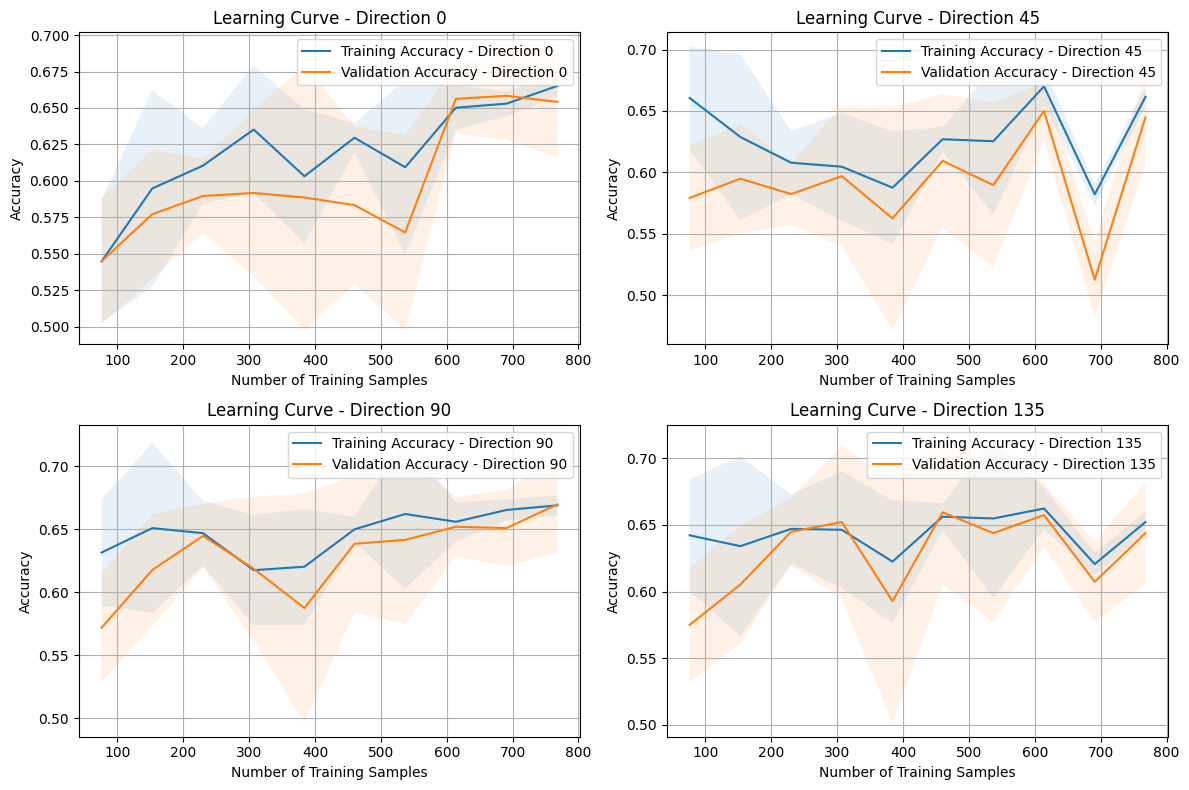

In [3]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, (direction, train_mean, test_mean) in enumerate(zip(directions, train_mean_list, test_mean_list)):
    row = i // 2  # Menentukan baris subplot
    col = i % 2  # Menentukan kolom subplot
    ax = axes[row, col]  # Mengambil sumbu subplot pada baris dan kolom yang sesuai
    ax.plot(train_sizes, train_mean, label=f'Training Accuracy - Direction {direction}')
    ax.plot(train_sizes, test_mean, label=f'Validation Accuracy - Direction {direction}')
    ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    ax.set_xlabel('Number of Training Samples')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Learning Curve - Direction {direction}')
    ax.legend(loc='best')
    ax.grid(True)

plt.tight_layout()  # Untuk menjaga jarak antara subplot
plt.show()

In [4]:
for i in range(len(accuracies)):
    print(i, accuracies[i])

0 0.8895833333333333
1 0.8927083333333333
2 0.8166666666666667
3 0.8583333333333333
4 0.821875
5 0.83125
6 0.875
7 0.8833333333333333
8 0.9395833333333333
9 0.8510416666666667
10 0.8854166666666666
11 0.8885416666666667
12 0.8854166666666666
13 0.9020833333333333
14 0.8989583333333333
15 0.9177083333333333
16 0.8989583333333333
17 0.846875
18 0.8166666666666667
19 0.8239583333333333


In [5]:
degree_ = ["Akurasi","Degree 0","Degree 45","Degree 90","Degree 135"]
distances = ["Jarak 1","Jarak 2","Jarak 3","Jarak 4","Jarak 5"]

dataAkurasi = {
    degree_[0] : distances,
    degree_[1] : [accuracies[0], accuracies[1], accuracies[2], accuracies[3], accuracies[4]],
    degree_[2] : [accuracies[5], accuracies[6], accuracies[7], accuracies[8], accuracies[9]],
    degree_[3] : [accuracies[10], accuracies[11], accuracies[12], accuracies[13], accuracies[14]],
    degree_[4] : [accuracies[15], accuracies[16], accuracies[17], accuracies[18], accuracies[19]]
}

degree_ = ["F1 Score","Degree 0","Degree 45","Degree 90","Degree 135"]
distances = ["Jarak 1","Jarak 2","Jarak 3","Jarak 4","Jarak 5"]

dataF1Score = {
    degree_[0] : distances,
    degree_[1] : [f1score[0], f1score[1], f1score[2], f1score[3], f1score[4]],
    degree_[2] : [f1score[5], f1score[6], f1score[7], f1score[8], f1score[9]],
    degree_[3] : [f1score[10], f1score[11], f1score[12], f1score[13], f1score[14]],
    degree_[4] : [f1score[15], f1score[16], f1score[17], f1score[18], f1score[19]]
}

degree_ = ["Presisi","Degree 0","Degree 45","Degree 90","Degree 135"]
distances = ["Jarak 1","Jarak 2","Jarak 3","Jarak 4","Jarak 5"]

dataPresisi = {
    degree_[0] : distances,
    degree_[1] : [precision[0], precision[1], precision[2], precision[3], precision[4]],
    degree_[2] : [precision[5], precision[6], precision[7], precision[8], precision[9]],
    degree_[3] : [precision[10], precision[11], precision[12], precision[13], precision[14]],
    degree_[4] : [precision[15], precision[16], precision[17], precision[18], precision[19]]
}

In [6]:
df2 = pd.DataFrame(dataAkurasi)
print(df2)
print("=============================")
df3 = pd.DataFrame(dataF1Score)
print(df3)
print("=============================")
df4 = pd.DataFrame(dataPresisi)
print(df4)
print("=============================")


   Akurasi  Degree 0  Degree 45  Degree 90  Degree 135
0  Jarak 1  0.889583   0.831250   0.885417    0.917708
1  Jarak 2  0.892708   0.875000   0.888542    0.898958
2  Jarak 3  0.816667   0.883333   0.885417    0.846875
3  Jarak 4  0.858333   0.939583   0.902083    0.816667
4  Jarak 5  0.821875   0.851042   0.898958    0.823958
  F1 Score  Degree 0  Degree 45  Degree 90  Degree 135
0  Jarak 1  0.896887   0.825431   0.895636    0.916930
1  Jarak 2  0.890075   0.877551   0.892028    0.900513
2  Jarak 3  0.831094   0.890838   0.892996    0.863256
3  Jarak 4  0.841121   0.941414   0.905622    0.833962
4  Jarak 5  0.837915   0.863680   0.900103    0.800942
   Presisi  Degree 0  Degree 45  Degree 90  Degree 135
0  Jarak 1  0.844322   0.858744   0.825175    0.929638
1  Jarak 2  0.916484   0.863454   0.868369    0.890467
2  Jarak 3  0.773214   0.840074   0.840659    0.782462
3  Jarak 4  0.962567   0.917323   0.877432    0.764706
4  Jarak 5  0.771379   0.798942   0.893661    0.926431


In [7]:
print(df.head())

   Contrast_1_0  Contrast_1_45  Contrast_1_90  Contrast_1_135   ASM_1_0   
0    121.660156       0.132233      -1.125075        5.540405  0.246983  \
1     42.448853       0.190140      -0.868638        1.474854  0.527082   
2     32.008240       0.161906      -0.942689        1.940735  0.483254   
3     44.135437       0.309875      -0.610181        0.270203  0.645022   
4     47.201721       0.208768      -0.854545        3.481262  0.231551   

     ASM_1_45  ASM_1_90  ASM_1_135  Entropy_1_0  Entropy_1_45  ...   
0  307.034058  0.059872  -1.417850    11.297485      0.138265  ...  \
1  194.896912  0.083594  -1.254675     5.844543      0.304330  ...   
2  129.588623  0.069999  -1.298475     6.062744      0.254250  ...   
3  226.208557  0.078693  -1.283617     6.431335      0.282633  ...   
4  566.512939  0.053679  -1.443753    16.129395      0.099075  ...   

   Entropy_5_90  Entropy_5_135  Mean_5_0  Mean_5_45  Mean_5_90  Mean_5_135   
0    364.353455       0.054385 -1.463792  12.72369

In [8]:
threshold = 0.07

# Mendefinisikan status model
model_status = []

# Memeriksa setiap kurva pembelajaran
for direction, train_mean, test_mean in zip(directions, train_mean_list, test_mean_list):
    train_diff = np.abs(train_mean - test_mean)  # Selisih antara akurasi pelatihan dan validasi
    max_diff = np.max(train_diff)  # Nilai selisih maksimum
    
    if max_diff > threshold:  # Jika selisih maksimum melebihi threshold, model dianggap overfitting
        status = 'Overfitting'
    elif np.mean(train_mean) < 0.5:  # Jika akurasi pelatihan rata-rata rendah, model dianggap underfitting
        status = 'Underfitting'
    else:  # Jika tidak memenuhi kriteria di atas, model dianggap baik
        status = 'Good'
    
    model_status.append((direction, status))

# Menampilkan hasil evaluasi model
for direction, status in model_status:
    print(f"Direction: {direction}\tStatus: {status}")

Direction: 0	Status: Good
Direction: 45	Status: Overfitting
Direction: 90	Status: Good
Direction: 135	Status: Good
